In [1]:
from itertools import product, combinations
from collections import Counter
import secrets
import pandas as pd
import plotly.express as px

d6 = (1,2,3,4,5,6)
d6x2 = (2,3,4,5,6,7,8,9,10,11,12)

# Combo Distributions

## Distribution on 2d6

Gets all the combinations of a 2d6 roll and calculates a list of possible results

In [2]:
rolls2 = [x for x in product(d6, repeat=2)]
values2 = [sum(y) for y in rolls2]

Counts all the instances of a value and creates a data frame with the totals and density

In [3]:
dist2 = []
for k,v in Counter(values2).items():
    dist2.append({'dice': '2d6', 'value': k, 'count':v, 'density': v/len(values2)})
df2 = pd.DataFrame(dist2)
df2

,dice,value,count,density
0,2d6,2,1,0.027778
1,2d6,3,2,0.055556
2,2d6,4,3,0.083333
3,2d6,5,4,0.111111
4,2d6,6,5,0.138889
5,2d6,7,6,0.166667
6,2d6,8,5,0.138889
7,2d6,9,4,0.111111
8,2d6,10,3,0.083333
9,2d6,11,2,0.055556


Graph the distribution

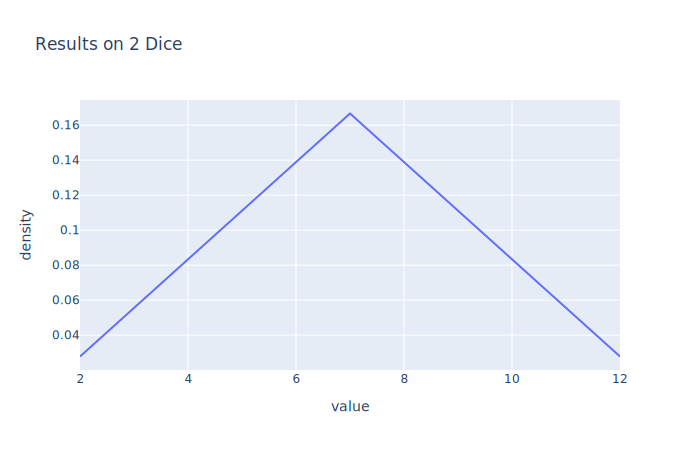

In [4]:
fig = px.line(df2, x='value', y='density', title='Results on 2 Dice')
fig.show("svg")

## Distribution on 3 Dice

Gets all of the combinations of rolls on 3d6. Gets all possible pairs for 2 out of three for those combinations. Creates a set of all possible summed values for each of those combinations

In [5]:
rolls3 = [x for x in product(d6, repeat=3)]
combos3 = [tuple(combinations(x, 2)) for x in rolls3]
values3 = [set(map(sum, combinations(x, 2))) for x in rolls3]

For each possible 2d6 result, adds a "hit" for each result set that could produce that value

In [13]:
hits3 = []
for n in d6x2:
    for x in values3:
        if n in x:
            hits3.append(n)

Creates a distribution data frame for results and density of values that produce hits

In [7]:
dist3 = []
for k,v in Counter(hits3).items():
    dist3.append({'dice': '3d6', 'value': k, 'count':v, 'density': v/len(values3)})
df3 = pd.DataFrame(dist3)
df3

,dice,value,count,density
0,3d6,2,16,0.074074
1,3d6,3,30,0.138889
2,3d6,4,46,0.212963
3,3d6,5,60,0.277778
4,3d6,6,76,0.351852
5,3d6,7,90,0.416667
6,3d6,8,76,0.351852
7,3d6,9,60,0.277778
8,3d6,10,46,0.212963
9,3d6,11,30,0.138889


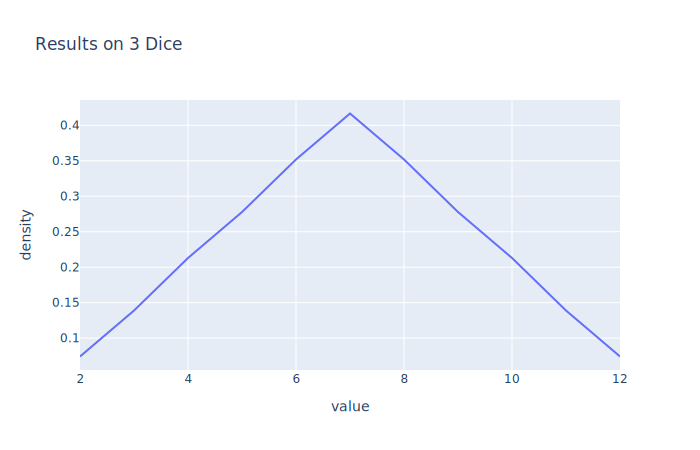

In [8]:
fig = px.line(df3, x='value', y='density', title='Results on 3 Dice')
fig.show("svg")

## Comparison

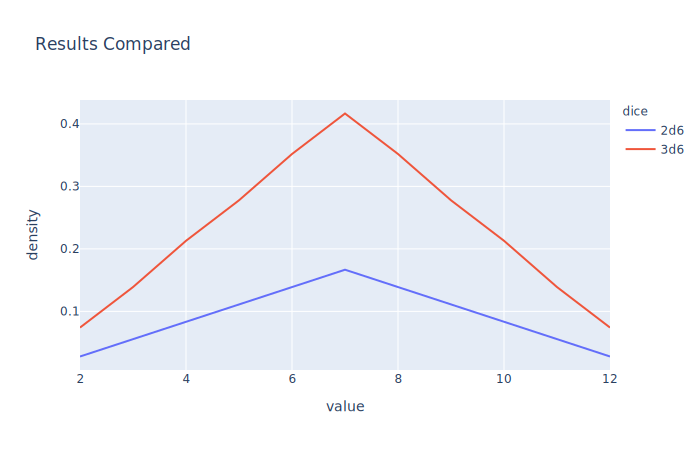

In [9]:
df = df2.append(df3)
fig = px.line(df, x='value', y='density', color='dice', title='Results Compared')
fig.show("svg")

# Brute Force

Rolls a whole bunch of dice and checks the results

In [10]:
def roll_for_target(target, dice):
    rolls = [secrets.choice(d6) for i in range(dice)]
    values = set(map(sum, combinations(rolls, 2)))
    return target in values

def try_for_target(target, dice, attempts):
    rolls = [roll_for_target(target, dice) for i in range(attempts)]
    hits = len(list(filter(lambda x: x, rolls)))
    return hits/attempts

In [11]:
results = []
for n in d6x2:
    results.append({
        'dice': '2d6',
        'value': n,
        'density': try_for_target(n, 2, 100_000)
    })
    results.append({
        'dice': '3d6',
        'value': n,
        'density': try_for_target(n, 3, 100_000)
    })
df = pd.DataFrame(results).sort_values(by=['dice','value']).reset_index()
df

,index,dice,value,density
0,0,2d6,2,0.02794
1,2,2d6,3,0.05522
2,4,2d6,4,0.08417
3,6,2d6,5,0.11158
4,8,2d6,6,0.13820
5,10,2d6,7,0.16545
6,12,2d6,8,0.13647
7,14,2d6,9,0.11161
8,16,2d6,10,0.08271
9,18,2d6,11,0.05489


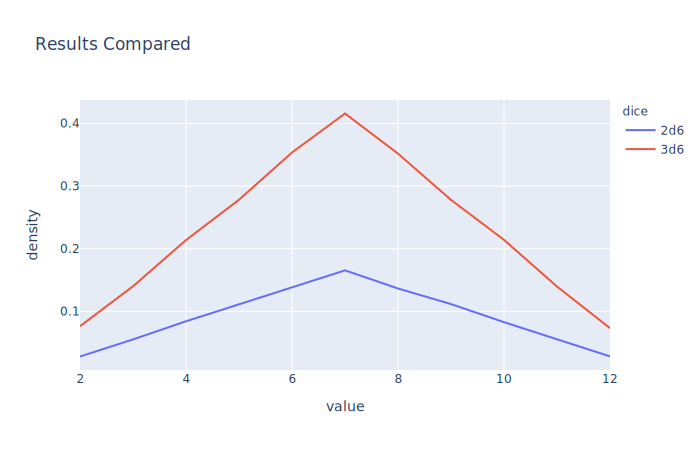

In [12]:
fig = px.line(df, x='value', y='density', color='dice', title='Results Compared')
fig.show("svg")